In [1]:
import numpy as np 
import pandas as pd 
import sklearn as sk 
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Chargement des données

In [5]:
data = pd.read_csv('full_set_complete.csv').drop(columns=['Index'])
data.head()

,patient_id,cohort,sexM,gene,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off
0,3332,0,0,1,48.5,52.1,607.0,1.9,14.779592,7.0,38.620296
1,3332,0,0,1,48.5,53.0,666.0,1.9,17.600000,12.0,44.000000
2,3332,0,0,1,48.5,53.9,717.0,1.2,14.878328,6.0,39.662327
3,3332,0,0,1,48.5,54.8,770.0,1.5,14.727947,11.0,40.183342
4,3332,0,0,1,48.5,56.9,885.0,0.3,14.326257,24.0,41.399048


In [2]:
# Chargement des données

data = pd.read_csv('full_set_complete.csv').drop(columns=['Index'])
Y_train= pd.read_csv('y_train_lXj6X5y.csv',index_col=0)
X_train= pd.read_csv('X_train_6ZIKlTY.csv', index_col=0)
X_test= pd.read_csv('X_test_oiZ2ukx.csv',index_col=0)
X_test.index = X_test.index + X_train.shape[0]  # Décale les index de X_test

## Feature engineering

In [3]:
# Catégorisation en entiers
cat_features = ['cohort', 'sexM', 'gene']

# Pairwise interactions categorielles
for f1, f2 in combinations(cat_features, 2):
    data[f"{f1}_{f2}_interaction"] = data[f1] * 10 + data[f2]  # ou data[f1].astype(str) + "_" + data[f2].astype(str)

# Affichage du dataset transformé
data.head(3)

,patient_id,cohort,sexM,gene,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off,cohort_sexM_interaction,cohort_gene_interaction,sexM_gene_interaction
0,3332,0,0,1,48.5,52.1,607.0,1.9,14.779592,7.0,38.620296,0,1,1
1,3332,0,0,1,48.5,53.0,666.0,1.9,17.600000,12.0,44.000000,0,1,1
2,3332,0,0,1,48.5,53.9,717.0,1.2,14.878328,6.0,39.662327,0,1,1


In [4]:
X_train_filled = data.loc[X_train.index]
Y_train = Y_train

# Pour la sélection de modèles
X_train_train, X_valid, y_train_train, y_valid = train_test_split(X_train_filled, Y_train, test_size=0.2, random_state=42)

# Pour la soumission
X_test_full = data.loc[X_test.index]

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_train, y_train_train)


y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
print(f"Mean Squared Error sur le set de validation : {mse}")

c:\Users\soelm\Documents\04_Code\MVA\MVA_venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error sur le set de validation : 45.45056385783653


C:\Users\soelm\AppData\Local\Temp\ipykernel_141712\701310133.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')


Text(0, 0.5, 'Features')

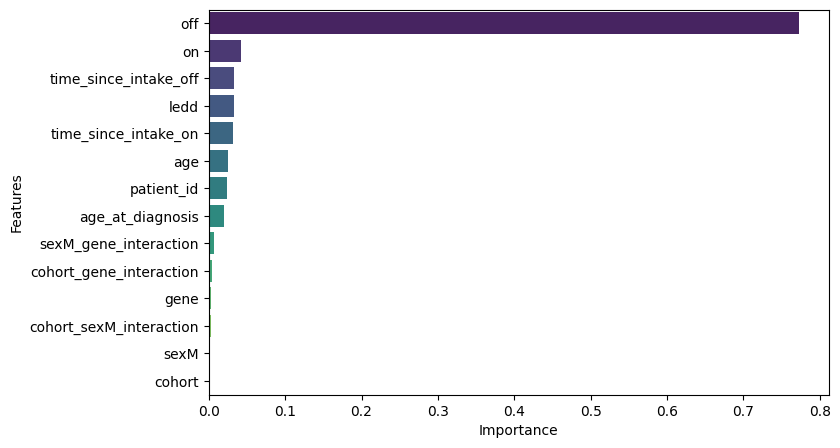

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraire l'importance des features
feature_importance = model.feature_importances_

# Créer un DataFrame pour trier et visualiser
importance_df = pd.DataFrame({'Feature': X_train_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les valeurs
#print(importance_df)

# Visualisation avec un barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
